In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
plt.rc('font',family='serif', size=12)  

## 1. Basic Bar Charts and Histograms

- Basic Pyplot function: `ax.bar`

- default rectangle width: `0.8`

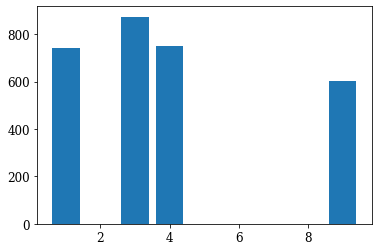

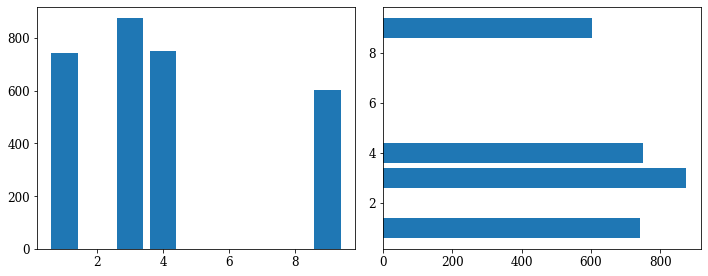

In [128]:
x = [random.randint(1,10) for n in range(5)]
y = [random.randint(500,1000) for n in range(5)]
#simplest bar chart
plt.bar(x,y)
plt.show()

#plotting bar graphs in more low level
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax[0].bar(x,y)
ax[1].barh(x,y) #for horizontal barcharts
fig.tight_layout()
plt.show()



### using ticklabels 

**Problem 1:** The following program produces a bar chart of letter frequencies in
the English language, estimated by analysis of the text of Moby-Dick. The vertical bars
are centered and labeled by letter. Source [Gutenberg Book](www.gutenberg.org/ebooks/2701) 

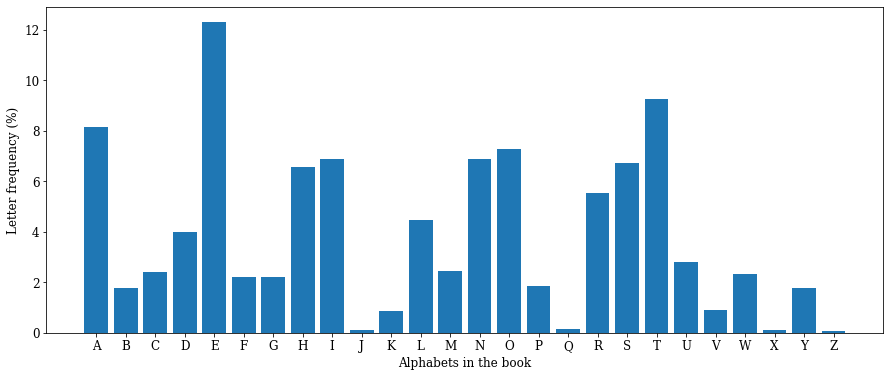

In [31]:
string = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

#first reading book and extracting data
with open("datas/moby-dick.txt",'r', encoding='utf8') as file:
    text = file.read().upper()

counts = {string[n]:text.count(string[n]) for n in range(26)}
counts = np.array(list(counts.values()))

fig, ax = plt.subplots(figsize=(15,6), facecolor='w', edgecolor='w')
ax.bar(range(26), height=counts/np.sum(counts)*100)

#new commands
ax.set_xticks(range(26)) #it sets ticks at this range or intervals
ax.set_xticklabels(string) #it sets tick labels to alphabets 

ax.set_xlabel('Alphabets in the book', fontfamily="serif", fontsize=12)
ax.set_ylabel('Letter frequency (%)',fontfamily="serif", fontsize=12)
plt.show()

### using hatchpatterns for stacked charts, monochrome plots

**Problem 2:**
The file germany-energy-sources.txt, which can be downloaded from https://scipython.com/eg/bae contains data on the renewable sources of electricityproduced in Germany from 1990 to 2018. Make a program that plots these data as a stacked bar chart in monochrome, using Matplotlib’s hatch patterns to distinguish between the different sources.


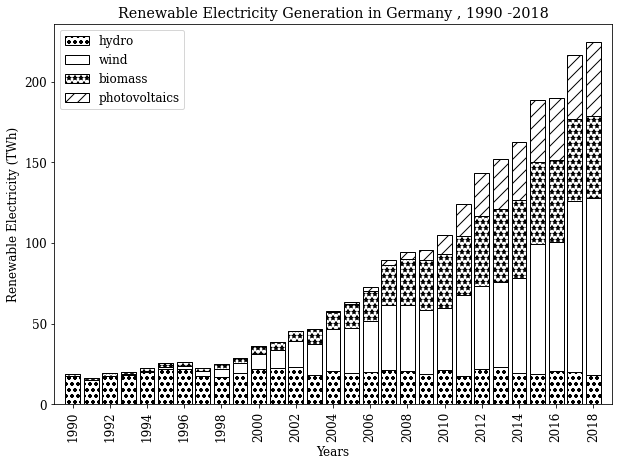

In [11]:
#reading and storing data: 
data = np.loadtxt("datas/renewable-energy-sources-in-germany.txt",skiprows=2, dtype='f8')
sources = ('hydro', 'wind', 'biomass', 'photovoltaics')

years = data[:, 0]
data[:, 1:] /= 1e3 #converting GWh to TWh

fig, ax = plt.subplots(figsize=(10,7))
hatch = ['oo', '', '**', '//']
bottom = np.zeros(len(years))
bars = [None]*len(years)

for i,source in enumerate(sources):
    bars[i] = ax.bar(years,height=data[:, i+1], bottom=bottom, color='w', edgecolor='k', hatch=hatch[i], align='center')
    bottom += data[:, i+1]

ax. set_xticks (years[::2]) # for clarity , label every other year
plt.xticks(rotation =90)
ax.set_xlim (1989 , 2019)
ax.set_ylabel ('Renewable Electricity (TWh)')
ax.set_xlabel('Years')
ax. set_title ('Renewable Electricity Generation in Germany , 1990 -2018')
plt.legend(bars , sources , loc='best')
plt.show ()


## 2. Pie Charts

`ax.pie()` and arguments are: `colors`, `labels`, `explode`, `shadow`, `startangle`, `autopct`, `pctdistance`, `labeldistance` and `radius`


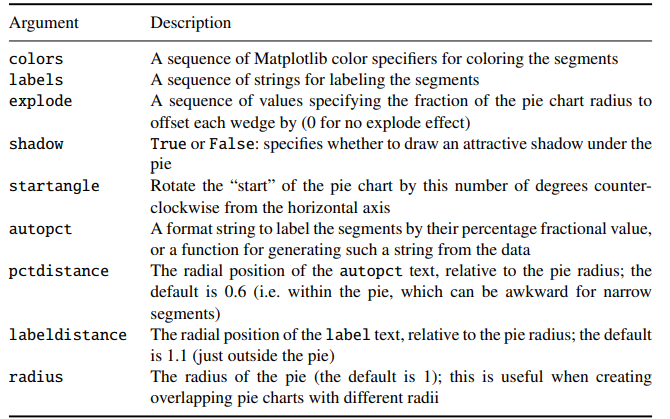

**Problem 3:** The following program depicts the emissions of greenhouse gases by mass of “carbon equivalent” (data from the 2007 IPCC report).


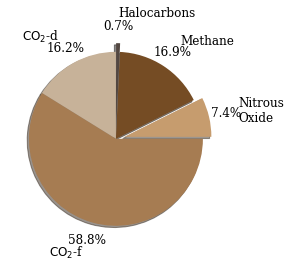

In [69]:
# Annual greenhouse gas emissions , billion tons carbon equivalent (GtCe ).
gas_emissions = np.array ([(r'$\mathrm{CO_2}$-d', 2.2) ,
(r'$\mathrm{CO_2}$-f', 8.0) ,
('Nitrous\nOxide', 1.0) ,
('Methane', 2.3) ,
('Halocarbons', 0.1)] ,
dtype =[('source', 'U17'), ('emission', 'f4')])
# Five colors beige.
colors = ['#C7B299', '#A67C52', '#C69C6E', '#754C24', '#534741']

explode = [0,0,0.1,0,0.1]

fig , ax = plt.subplots ()
#ax.axis('equal') # So our pie looks round!
ax.pie( gas_emissions ['emission'], colors=colors , shadow=True, startangle =90, explode=explode , labels= gas_emissions ['source'], autopct='%.1f%%' ,pctdistance =1.2 , labeldistance =1.35, radius=1)
plt.show ()



## 3. Polar Plots
 - Plotted $r$ as function of $\theta$
 - `pyplot.polar()` to plot in polar
 - `fig = plt.figure ()` and `ax = fig. add_subplot ( projection ='polar')` can be alternatively used


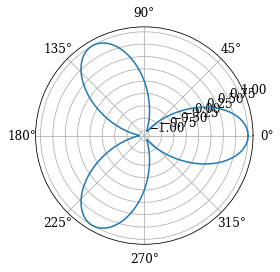

In [86]:
#method 1
theta = np.linspace(0, 2*np.pi,1000)
plt.polar(theta, np.cos(3*theta),)
plt.show()

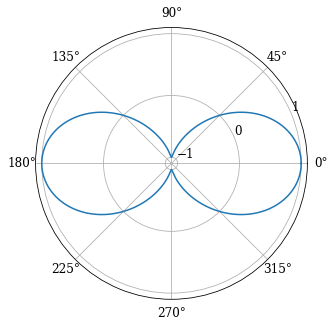

In [153]:
#method 2
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = 'polar')
ax.plot(theta, np.cos(2*theta))
ax.set_rlabel_position(22.5)
ax.set_rticks([-1,0,1])
#ax.grid(':')
plt.show()

**Problem 4: Learning more about polar plots**
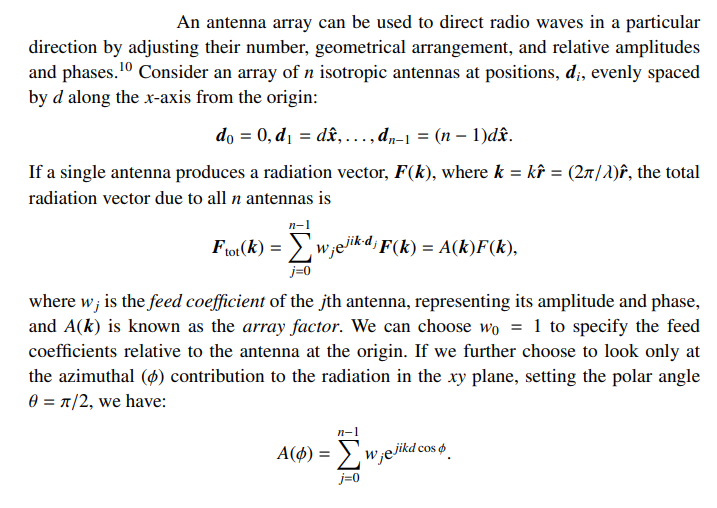

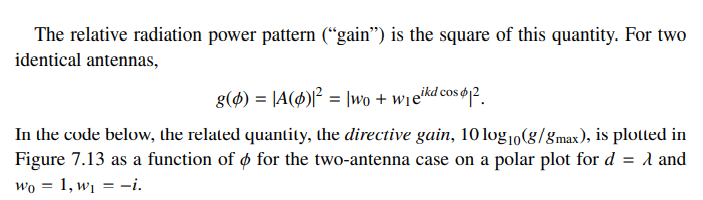

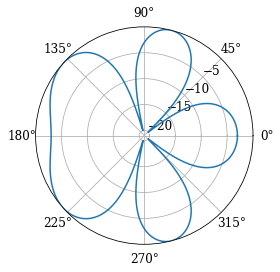

In [151]:
#The directive gain of a two-antenna array with d = λ, w0 = 1,w1 = −i

def gain(d, w):
    """ Return the power as a function of azimuthal angle , phi."""
    phi = np. linspace (0, 2*np.pi , 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    A = w[0] + w[1]* np.exp (1j*psi)
    g = np.abs(A)**2
    return phi , g
def get_directive_gain (g, minDdBi = -20):
    """ Return the " directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi , minDdBi , None)
# Wavelength , antenna spacing , feed coefficients .
lam = 1
d = lam
w = np.array ([1, -1j])
# Calculate gain and directive gain; plot on a polar chart.
phi , g = gain(d, w)
DdBi = get_directive_gain (g)
plt.polar(phi , DdBi)
ax = plt.gca ()
ax. set_rticks ([-20, -15, -10, -5])
ax. set_rlabel_position (45)
plt.show ()

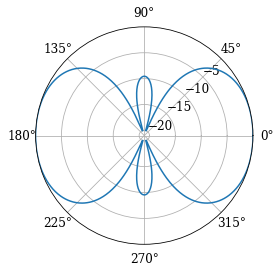

In [148]:
#The directive gain of a many-antenna array with d = λ/2, w0 = 1,w1 = −1,w2 = 1.

def gain(d, w):
    """ Return the power as a function of azimuthal angle , phi."""
    phi = np.linspace (0, 2*np.pi , 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    j = np.arange(len(w))
    A = np.sum(w[j] * np.exp(j * 1j * psi[:, None ]), axis =1)
    g = np.abs(A)**2
    return phi , g
def get_directive_gain (g, minDdBi = -20):
    """ Return the " directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi , minDdBi , None)
# Wavelength , antenna spacing , feed coefficients .
lam = 1
d = lam / 2
w = np.array ([1, -1, 1])
# Calculate gain and directive gain; plot on a polar chart.
phi , g = gain(d, w)
DdBi = get_directive_gain (g)
fig = plt.figure ()
ax = fig. add_subplot ( projection ='polar')
ax.plot(phi , DdBi)
ax. set_rticks([-20, -15, -10, -5])
ax. set_rlabel_position (45)
plt.show()